In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



# Setting up the right shape of the dataframe

In [100]:
df = pd.read_csv('../datasets/spotify_songs.csv')

In [101]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [102]:
df.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

In [103]:
df.isna().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [104]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], format = 'mixed')


In [105]:
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [106]:
clean_df = df.dropna(subset=['track_name', 'track_artist', 'track_album_name'])

# Verifying the result
print("New DataFrame shape:", clean_df.shape)
clean_df.isnull().sum()

New DataFrame shape: (32828, 23)


track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [107]:
df.dtypes

track_id                            object
track_name                          object
track_artist                        object
track_popularity                     int64
track_album_id                      object
track_album_name                    object
track_album_release_date    datetime64[ns]
playlist_name                       object
playlist_id                         object
playlist_genre                      object
playlist_subgenre                   object
danceability                       float64
energy                             float64
key                                  int64
loudness                           float64
mode                                 int64
speechiness                        float64
acousticness                       float64
instrumentalness                   float64
liveness                           float64
valence                            float64
tempo                              float64
duration_ms                          int64
dtype: obje

In [108]:
'''
le = LabelEncoder()

df['playlist_genre'] = le.fit_transform(df['playlist_genre'])

# Retrieve the mapping (label to integer)
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print("Label Encoding mapping:")
print(label_mapping)
'''


'\nle = LabelEncoder()\n\ndf[\'playlist_genre\'] = le.fit_transform(df[\'playlist_genre\'])\n\n# Retrieve the mapping (label to integer)\nlabel_mapping = dict(zip(le.classes_, le.transform(le.classes_)))\n\nprint("Label Encoding mapping:")\nprint(label_mapping)\n'

In [109]:
'''
le_sub = LabelEncoder()
df['playlist_subgenre'] = le_sub.fit_transform(df['playlist_subgenre'])
le_sub_mapping = dict(zip(le_sub.classes_, le_sub.transform(le_sub.classes_)))
print("Label Encoding mapping:")
print(le_sub_mapping)   
'''


'\nle_sub = LabelEncoder()\ndf[\'playlist_subgenre\'] = le_sub.fit_transform(df[\'playlist_subgenre\'])\nle_sub_mapping = dict(zip(le_sub.classes_, le_sub.transform(le_sub.classes_)))\nprint("Label Encoding mapping:")\nprint(le_sub_mapping)   \n'

In [110]:
df['duration_minutes'] = (df['duration_ms'] / 60000).round(2)

In [111]:
df.drop(columns=['duration_ms'], inplace=True)

should we change the types of categories?

# Starting to do EDA

In [112]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_minutes
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,3.25
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,2.71
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,2.94
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,2.82
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,3.15


In [113]:
df.drop('mode', axis=1, inplace=True) #this column is irrelevant + there are only two categories thus it can't really add that much value.


In [114]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = ['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_minutes']

# Initialize StandardScaler
scaler = MinMaxScaler()
df_compare = df.copy()
# Apply the scaler
df_compare[numeric_columns] = scaler.fit_transform(df_compare[numeric_columns])


<Axes: xlabel='playlist_genre'>

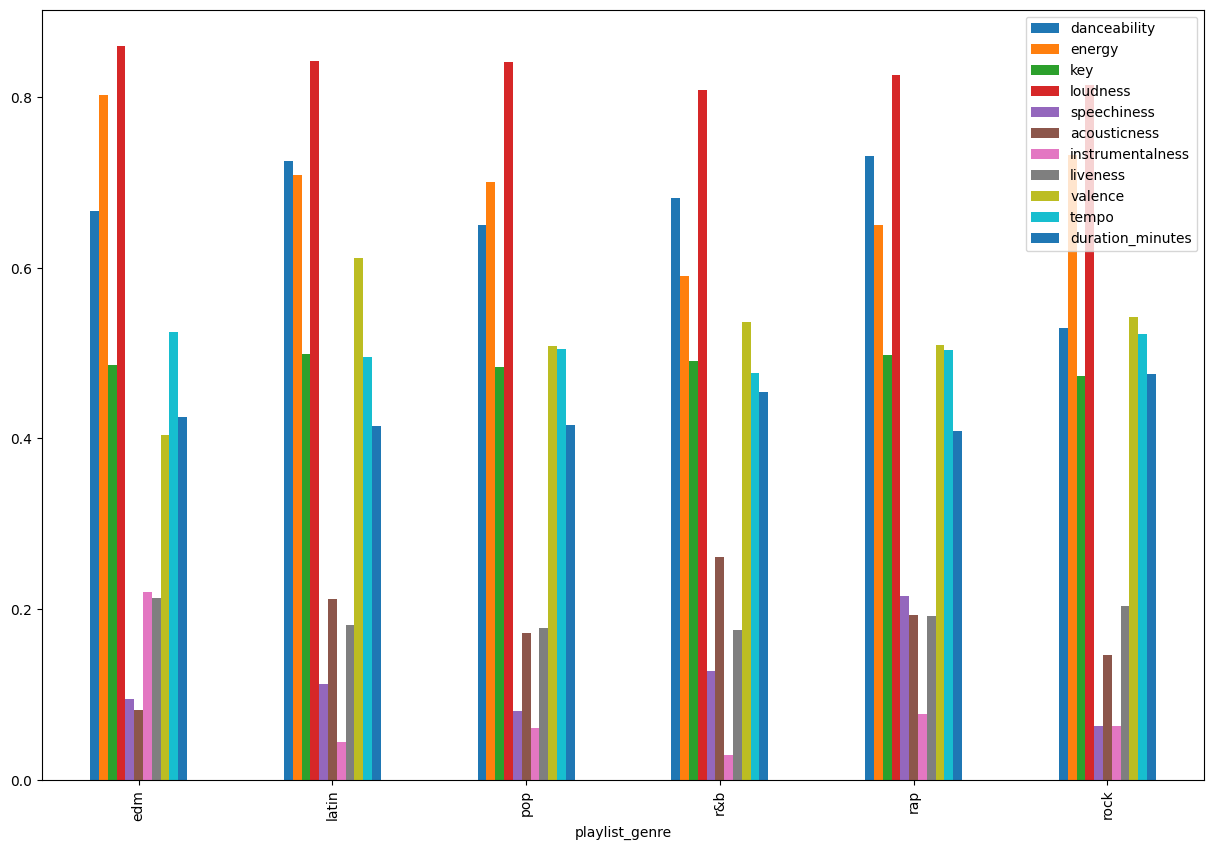

In [115]:
df_compare.groupby('playlist_genre')[['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_minutes']].mean().plot(kind='bar', figsize=(15, 10))

In [124]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_minutes
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.916,6,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,3.25
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.815,11,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,2.71
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.931,1,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,2.94
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.930,7,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,2.82
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.833,1,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,3.15


/var/folders/sw/6q2vf2dx0r502xm9jxzvdxzc0000gn/T/ipykernel_74935/1401804104.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_compare.groupby('popularity_range')[['danceability', 'energy', 'key', 'loudness', 'speechiness',


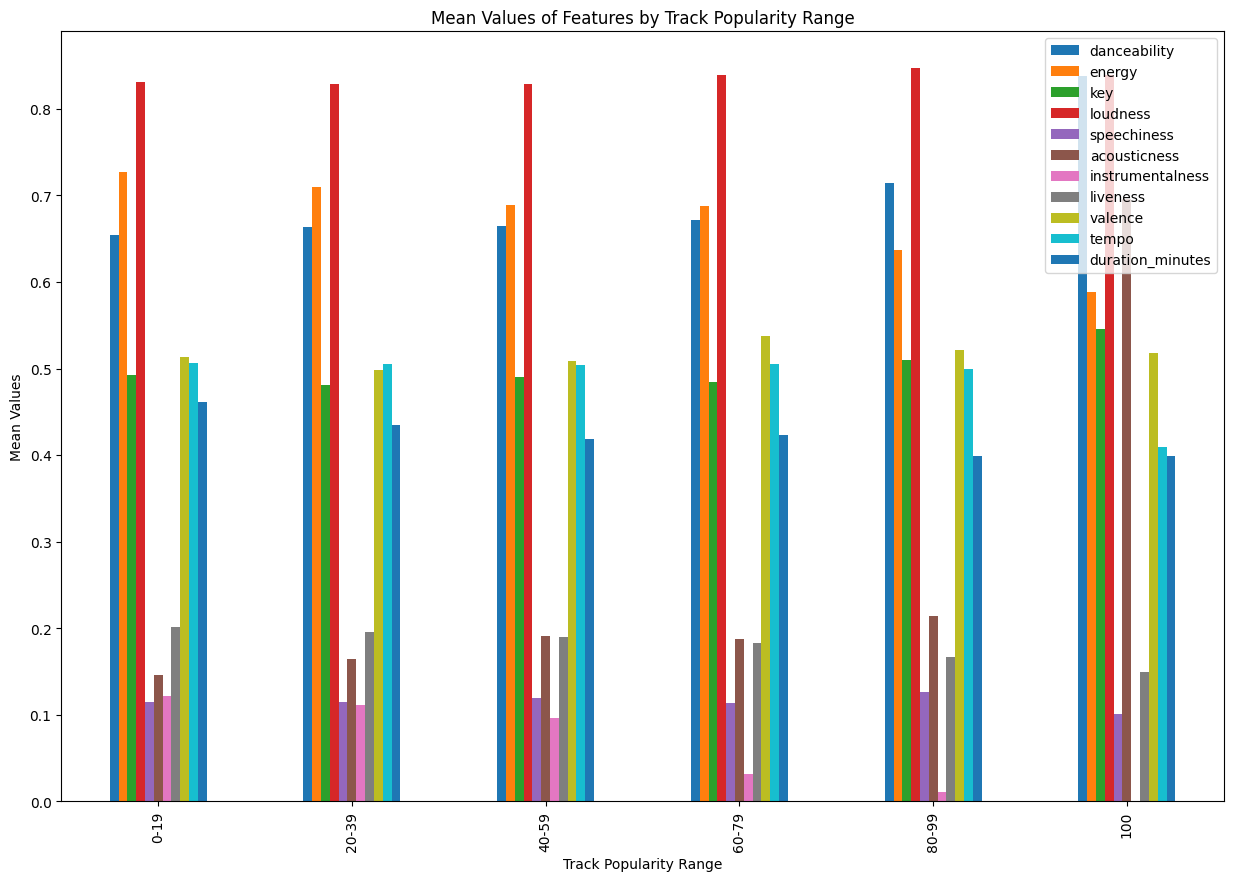

In [120]:
bins = [0, 19, 39, 59, 79, 99, 100]  # Adjust the bins as needed
labels = ['0-19', '20-39', '40-59', '60-79', '80-99', '100']  # Labels for the bins

# Bin 'track_popularity' and create a new column
df_compare['popularity_range'] = pd.cut(df_compare['track_popularity'], bins=bins, labels=labels, include_lowest=True)

# Group by the new 'popularity_range'
grouped_data = df_compare.groupby('popularity_range')[['danceability', 'energy', 'key', 'loudness', 'speechiness',
                                                       'acousticness', 'instrumentalness', 'liveness', 'valence', 
                                                       'tempo', 'duration_minutes']].mean()

# Plot
grouped_data.plot(kind='bar', figsize=(15, 10))
plt.xlabel('Track Popularity Range')
plt.ylabel('Mean Values')
plt.title('Mean Values of Features by Track Popularity Range')
plt.show()

<Axes: xlabel='track_popularity'>

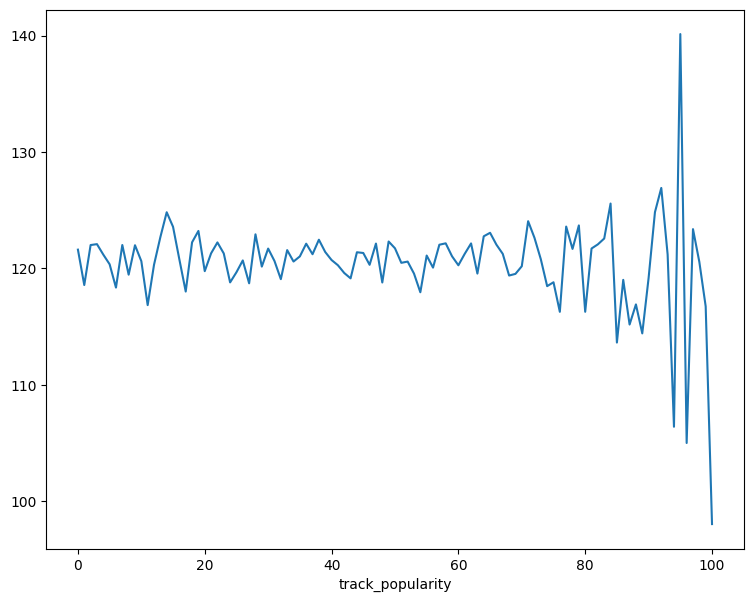

In [123]:
df.groupby('track_popularity')['tempo'].mean().plot(kind='line', figsize=(9, 7))

In [133]:
# Select columns where the dtype is 'object'
numeric_columns = df.loc[:, df.dtypes != 'object']
numeric_columns.columns


Index(['track_popularity', 'track_album_release_date', 'danceability',
       'energy', 'key', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_minutes'],
      dtype='object')